In [1]:
#importing necessary libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler

In [2]:
#reading the input data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#To display first 5 rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#Checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#To know the number of rows and columns in the dataset
df.shape

(5110, 12)

In [6]:
df = df.drop('id', axis=1)

In [7]:
# Gender
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
# Dropping Other gender
Other_gender = df[df['gender'] == 'Other'].index[0]
df = df.drop(Other_gender, axis=0)

In [9]:
#Finding missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
bmi,201,0.039342
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [10]:
null_filter = df[df.bmi.isnull()]
df.loc[null_filter.index, 'bmi'] = round(df['bmi'].mean(), 1)

In [11]:
#Finding missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0
smoking_status,0,0.0


In [12]:
secondary_df = df.copy()
labeler = LabelEncoder()
scaler = StandardScaler()
for column in secondary_df.columns:
    secondary_df[column] = labeler.fit_transform(secondary_df[column])
columns_temp = secondary_df.columns
secondary_df[columns_temp] = scaler.fit_transform(secondary_df[columns_temp])

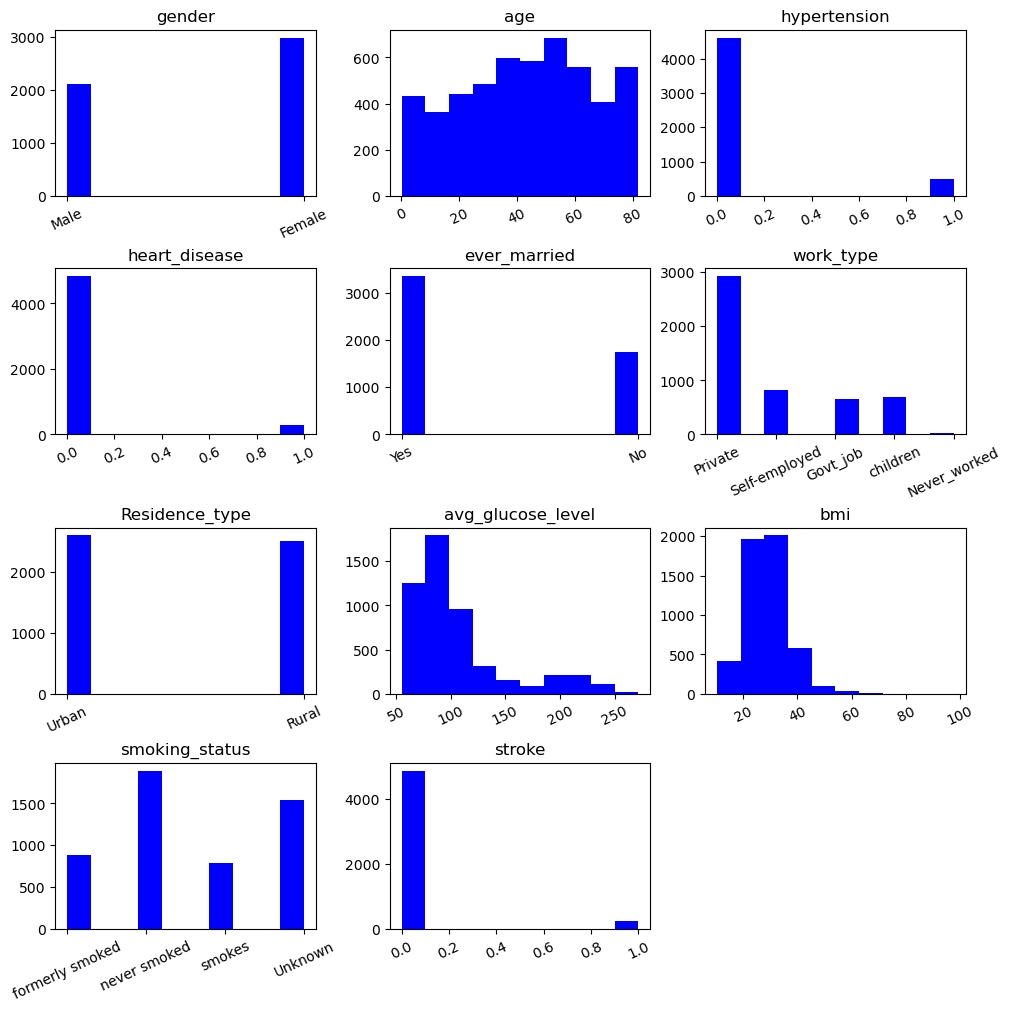

In [13]:
def mass_subplotting():
    rows = 0
    columns = 0
    fig, ax = plt.subplots(4, 3, constrained_layout=True, figsize=(10, 10))
    fig.delaxes(ax[3][2])
    for column in df.columns:
        ax[rows, columns].hist(df[column], color='b')
        ax[rows, columns].tick_params(axis='x', labelrotation = 25)
        ax[rows, columns].set_title(column)
        if columns < 2:
            columns += 1
        else:
            rows += 1
            columns = 0
    plt.show()

mass_subplotting()

C:\Users\mikhi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


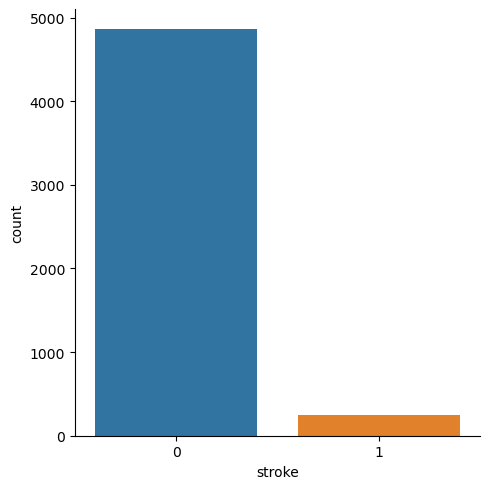

In [14]:
sns.factorplot('stroke',data=df,kind='count')

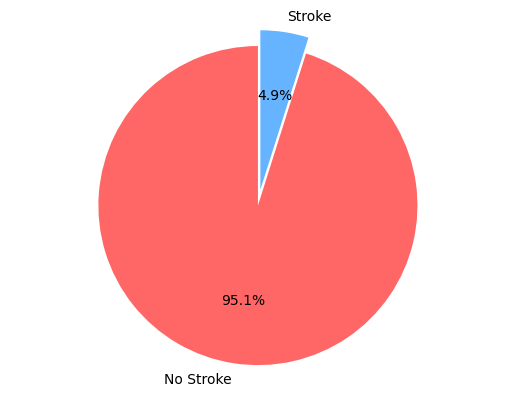

In [15]:
plt.pie(df['stroke'].value_counts(), labels=['No Stroke', 'Stroke'], colors=['#ff6666', '#66b3ff'], explode=(0, 0.1), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

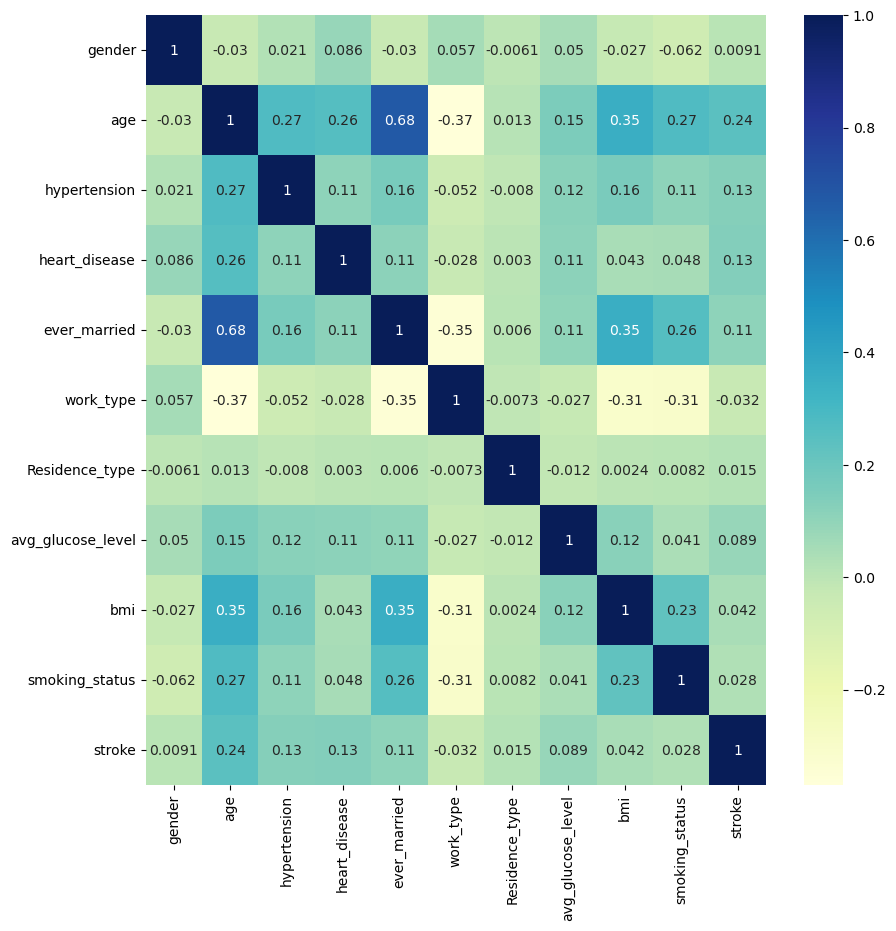

In [16]:
correlation = secondary_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlation, annot=True, cmap='YlGnBu', ax=ax)
plt.show()

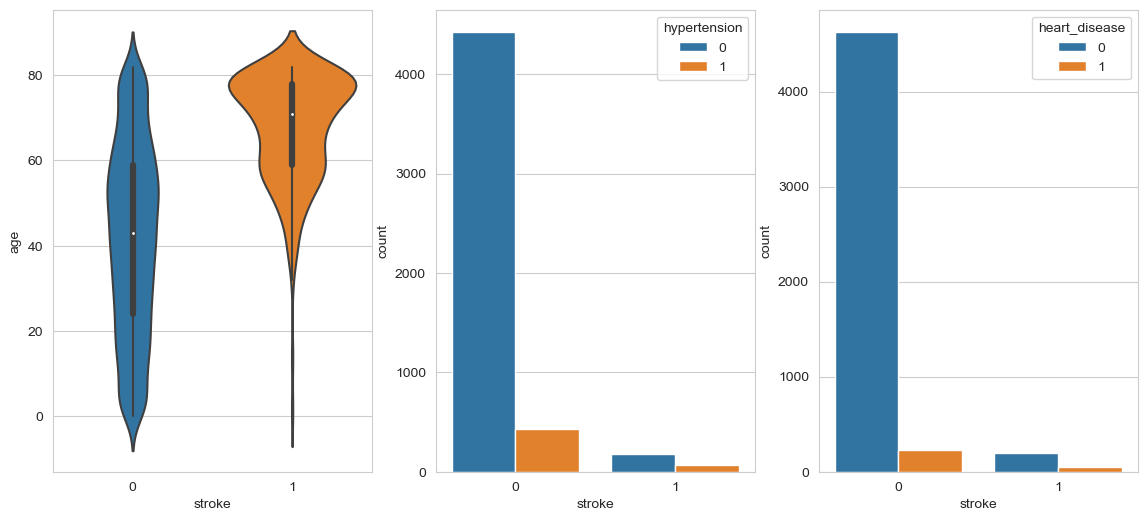

In [17]:
sns.set_style('whitegrid')
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(14,6))
sns.violinplot(data=df, x='stroke', y='age', ax=ax0)
sns.countplot(data=df, x='stroke', hue='hypertension', ax=ax1)
sns.countplot(data=df, x='stroke', hue='heart_disease', ax=ax2)
plt.show()

In [18]:
#Create x and y variables
X = df.drop('stroke', axis=1)
y = df['stroke']

In [19]:
# Label Encoding:
X['ever_married'] = np.where(X['ever_married']=='Yes',1,0)   ## If married replace with by 1 otherwise 0.
X['Residence_type'] = np.where(X['Residence_type']=='Rural',1,0)    ## If residence type is Rural replace it by 1 otherwise 0.

In [20]:
# One Hot Encoding:
X = pd.get_dummies(X, drop_first=True)

In [21]:
# Rearranging the columns for better understanding
X = X[['gender_Male','age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 
       'work_type_Never_worked', 'work_type_Private','work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked','smoking_status_smokes']]

In [22]:
#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state = 100)

In [23]:
#Current Class Balance
print('Stroke Distribution')
num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
print('Class 0 -',  num_zeros)
print('Class 1 -',  num_ones)

Stroke Distribution
Class 0 - 3888
Class 1 - 199


In [24]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
X_train_smt,y_train_smt = smt.fit_resample(X_train,y_train)

In [25]:
#Current Class Balance
print('Stroke Distribution')
num_zeros = (y_train_smt == 0).sum()
num_ones = (y_train_smt == 1).sum()
print('Class 0 -',  num_zeros)
print('Class 1 -',  num_ones)

Stroke Distribution
Class 0 - 3888
Class 1 - 3888


In [26]:
#Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smt,y_train_smt)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)

In [29]:
# Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9060665362035225
[[916  56]
 [ 40  10]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.15      0.20      0.17        50

    accuracy                           0.91      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.92      0.91      0.91      1022



In [30]:
import pickle
# Creating a pickle file for the classifier
filename = 'Stroke_prediction.pkl'
pickle.dump(model, open(filename, 'wb'))